In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    "../data/process_data/weather_stage1_loaded.csv",
    parse_dates=["timestamp"],
)
df.head()

,station_id,timestamp,temp_c,rain_mm,humidity_pct,pressure_hpa,wind_speed_mps,wind_direction_deg,pm25,pm10
0,1,2020-01-01,31.491409,1.0,45.704988,1012.641964,3.114026,166.148254,86.397213,111.814972
1,5,2020-01-01,20.168627,0.0,80.057943,1024.459041,2.940333,328.472986,65.877274,149.232454
2,2,2020-01-01,28.855202,0.5,53.038034,999.104556,2.112275,148.006112,49.146354,116.641144
3,4,2020-01-01,16.405171,0.0,91.966665,1007.644310,1.786636,9.459518,47.964555,182.825386
4,3,2020-01-01,27.285035,0.0,56.622327,1002.424969,3.013912,198.057606,86.614217,103.550101


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175205 entries, 0 to 175204
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   station_id          175205 non-null  int64         
 1   timestamp           175205 non-null  datetime64[ns]
 2   temp_c              175205 non-null  float64       
 3   rain_mm             175205 non-null  float64       
 4   humidity_pct        175205 non-null  float64       
 5   pressure_hpa        175205 non-null  float64       
 6   wind_speed_mps      175205 non-null  float64       
 7   wind_direction_deg  175205 non-null  float64       
 8   pm25                175205 non-null  float64       
 9   pm10                175205 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 13.4 MB


In [3]:
df.describe()


,station_id,timestamp,temp_c,rain_mm,humidity_pct,pressure_hpa,wind_speed_mps,wind_direction_deg,pm25,pm10
count,175205.000000,175205,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000,175205.000000
mean,3.000000,2021-12-31 00:00:00,27.005798,0.094649,64.957909,1009.999520,2.503360,179.974158,60.028063,89.970108
min,1.000000,2020-01-01 00:00:00,3.083805,0.000000,-3.501162,987.584963,-1.857991,0.000541,-30.550414,-33.232821
25%,2.000000,2020-12-31 00:00:00,23.647684,0.000000,54.867365,1006.609210,1.827088,89.873992,46.556391,69.602188
50%,3.000000,2021-12-31 00:00:00,27.017236,0.000000,64.970205,1010.013031,2.503869,179.918778,59.950780,89.972045
75%,4.000000,2022-12-31 00:00:00,30.370403,0.000000,75.068157,1013.371262,3.177856,270.079199,73.515683,110.225852
max,5.000000,2023-12-31 00:00:00,48.162096,1.000000,130.720247,1033.106645,7.156243,359.998065,145.072926,224.750097
std,1.414218,NaN,4.992958,0.238989,15.001583,4.996531,1.003688,103.973354,19.993724,30.053351


In [4]:
#create month column from timestamp

df["month"] = df["timestamp"].dt.month

df[["timestamp", "month"]].head()

,timestamp,month
0,2020-01-01,1
1,2020-01-01,1
2,2020-01-01,1
3,2020-01-01,1
4,2020-01-01,1


In [5]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["month"].apply(get_season)

df[["timestamp", "month", "season"]].head()

,timestamp,month,season
0,2020-01-01,1,Winter
1,2020-01-01,1,Winter
2,2020-01-01,1,Winter
3,2020-01-01,1,Winter
4,2020-01-01,1,Winter


In [6]:
season_mean = df.groupby("season")[["pm25", "pm10"]].mean()
season_mean


,pm25,pm10
season,,
Autumn,60.117183,89.854861
Spring,59.925101,90.120881
Summer,60.121760,89.872231
Winter,59.947431,90.032556


<Figure size 800x500 with 0 Axes>

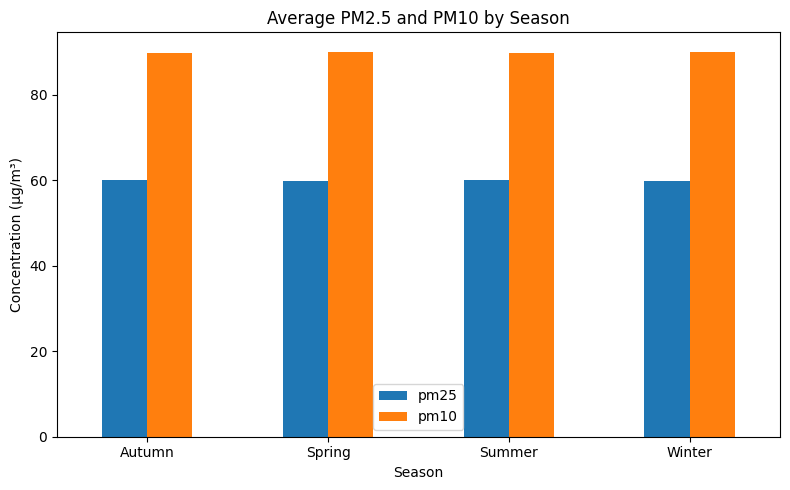

In [7]:
plt.figure(figsize=(8, 5))

season_mean.plot(kind="bar", figsize=(8,5))

plt.title("Average PM2.5 and PM10 by Season")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Season")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()


In [8]:
# compute monthly mean for PM2.5 and PM10
monthly_mean = df.groupby("month")[["pm25", "pm10"]].mean()
monthly_mean


,pm25,pm10
month,,
1,59.873812,89.830516
2,60.033893,90.269948
3,59.994089,90.207441
4,59.783979,90.079092
5,59.992683,90.074763
6,59.933903,89.887709
7,60.421231,89.998160
8,60.004087,89.731325
9,60.161919,89.556501


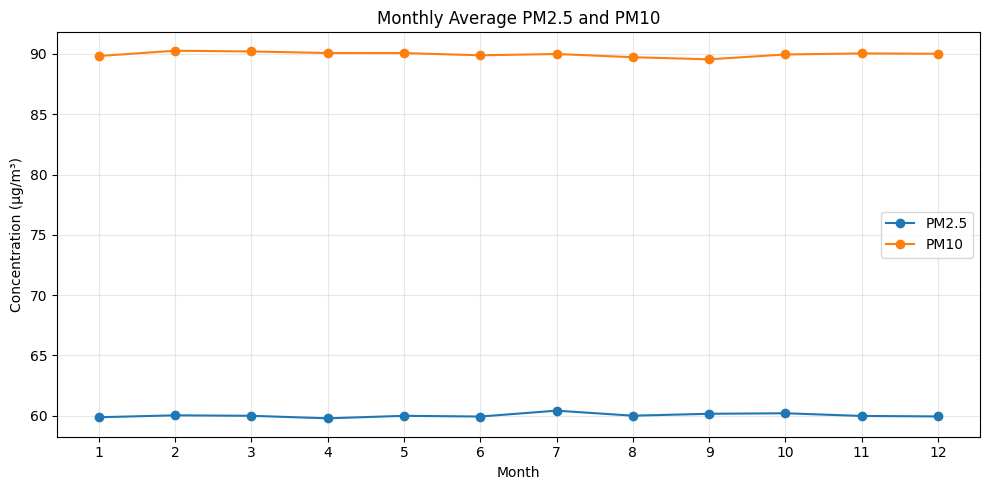

In [9]:
plt.figure(figsize=(10,5))

plt.plot(monthly_mean.index, monthly_mean["pm25"], marker="o", label="PM2.5")
plt.plot(monthly_mean.index, monthly_mean["pm10"], marker="o", label="PM10")

plt.title("Monthly Average PM2.5 and PM10")
plt.xlabel("Month")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(range(1,13))
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()


In [10]:
# extract hour and weekday
df["hour"] = df["timestamp"].dt.hour
df["weekday"] = df["timestamp"].dt.dayofweek   # Monday=0 ... Sunday=6


In [11]:
hourly_mean = df.groupby("hour")[["pm25", "pm10"]].mean()
hourly_mean


,pm25,pm10
hour,,
0,59.801655,89.733458
1,60.367188,90.293114
2,60.116017,89.897416
3,59.669449,89.647965
4,59.985583,89.711890
5,59.833894,89.787016
6,60.100476,90.795667
7,59.904998,89.956881
8,59.984591,90.101042


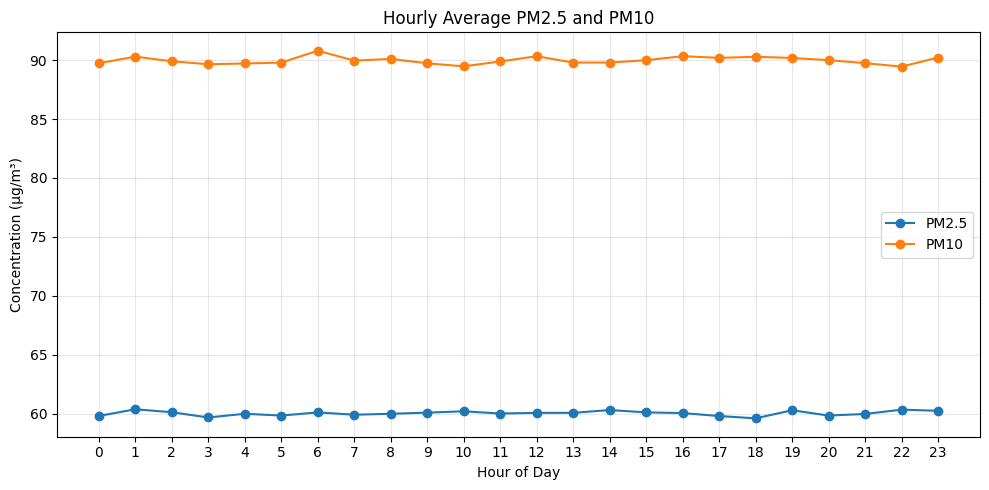

In [12]:
plt.figure(figsize=(10,5))
plt.plot(hourly_mean.index, hourly_mean["pm25"], marker="o", label="PM2.5")
plt.plot(hourly_mean.index, hourly_mean["pm10"], marker="o", label="PM10")

plt.title("Hourly Average PM2.5 and PM10")
plt.xlabel("Hour of Day")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# average PM by weekday (0=Mon, 6=Sun)
weekday_mean = df.groupby("weekday")[["pm25", "pm10"]].mean()
weekday_mean


,pm25,pm10
weekday,,
0,60.025422,90.114639
1,59.927634,89.739348
2,60.036947,90.095940
3,60.158775,90.116356
4,60.088289,89.826952
5,59.994602,90.018420
6,59.963983,89.878269


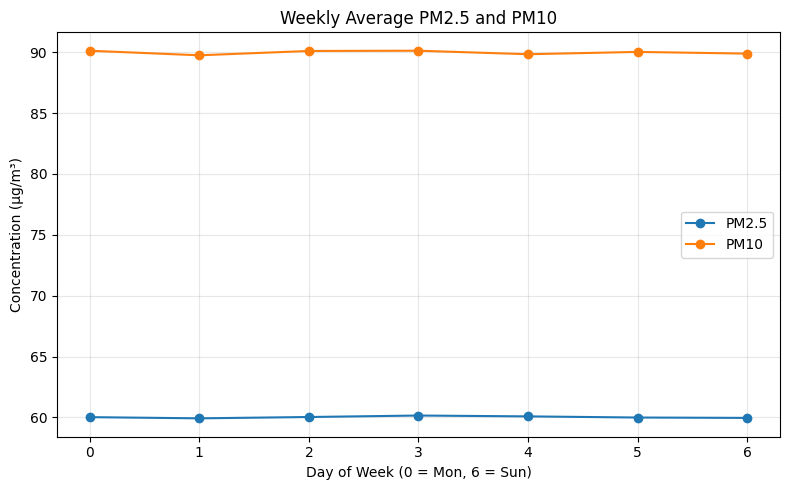

In [14]:
plt.figure(figsize=(8,5))
plt.plot(weekday_mean.index, weekday_mean["pm25"], marker="o", label="PM2.5")
plt.plot(weekday_mean.index, weekday_mean["pm10"], marker="o", label="PM10")

plt.title("Weekly Average PM2.5 and PM10")
plt.xlabel("Day of Week (0 = Mon, 6 = Sun)")
plt.ylabel("Concentration (µg/m³)")
plt.xticks(range(0,7))
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
